# 输出层需要概率输出的分类任务

使用 SimpleNN 作为二分类模型，并结合 sklearn.datasets.make_classification 生成的合成数据集进行训练。

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成二分类数据集
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 转换为 PyTorch 张量
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# 定义模型
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 5)
        self.act = nn.Sigmoid()
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.act(self.fc1(x))
        return self.fc2(x)

# 初始化模型和优化器
model = SimpleNN()
criterion = nn.BCEWithLogitsLoss()  # 二元交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 评估模型
model.eval()
with torch.no_grad():
    y_pred = torch.sigmoid(model(X_test)).round().numpy()
accuracy = accuracy_score(y_test.numpy(), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch [10/100], Loss: 0.6665
Epoch [20/100], Loss: 0.6172
Epoch [30/100], Loss: 0.5569
Epoch [40/100], Loss: 0.4926
Epoch [50/100], Loss: 0.4361
Epoch [60/100], Loss: 0.3928
Epoch [70/100], Loss: 0.3627
Epoch [80/100], Loss: 0.3431
Epoch [90/100], Loss: 0.3307
Epoch [100/100], Loss: 0.3229
Test Accuracy: 0.8400


# LSTM 网络中的门控机制

在 LSTM 中，Sigmoid 函数用于控制门控机制（遗忘门、输入门和输出门）。

In [7]:
import torch
import torch.nn as nn

class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.lstm.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.lstm.hidden_size)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出
        return torch.sigmoid(out)  # 输出概率

# 随机数据测试模型
input_size = 10
hidden_size = 5
output_size = 1

model = SimpleLSTM(input_size, hidden_size, output_size)
x = torch.randn(32, 5, input_size)  # 32 是 batch_size，5 是序列长度
output = model(x)
print("LSTM output:", output)

LSTM output: tensor([[0.5431],
        [0.4636],
        [0.4578],
        [0.5197],
        [0.5001],
        [0.5229],
        [0.4976],
        [0.4924],
        [0.5234],
        [0.5413],
        [0.4881],
        [0.4861],
        [0.5162],
        [0.5169],
        [0.4688],
        [0.5114],
        [0.5059],
        [0.5013],
        [0.5215],
        [0.4460],
        [0.5219],
        [0.5306],
        [0.5099],
        [0.4722],
        [0.4930],
        [0.5114],
        [0.5249],
        [0.4784],
        [0.4850],
        [0.4994],
        [0.4955],
        [0.4910]], grad_fn=<SigmoidBackward0>)


# 强化学习的动作选择概率

在策略梯度方法中，Sigmoid 函数可以用于输出动作选择的概率。其中策略网络使用 Sigmoid 作为输出层。

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 生成模拟数据集
# 特征：用户年龄、浏览历史、广告类型、设备类型
# 标签：是否点击广告（0：未点击，1：点击）
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)
print("预测结果:", y_pred)

# 模型评估
print("准确率:", accuracy_score(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred))

预测结果: [1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 1 0 1 0]
准确率: 0.8666666666666667
分类报告:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       153
           1       0.88      0.84      0.86       147

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


准确率: 0.9736842105263158
分类报告:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


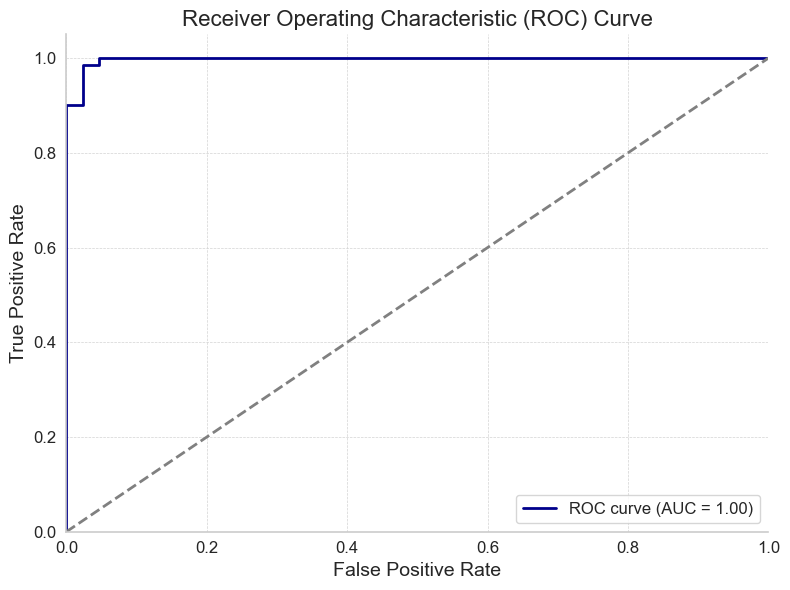

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report

# 加载乳腺癌数据集
data = load_breast_cancer()
X, y = data.data, data.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建逻辑回归模型，增加最大迭代次数
model = LogisticRegression(max_iter=300, solver='lbfgs')
model.fit(X_train_scaled, y_train)

# 预测测试集的概率
y_scores = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

# 模型评估
print("准确率:", accuracy_score(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred))

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()